# WeatherPy

In [1]:
#pip install citipy
#import dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import requests
import time
from scipy.stats import linregress
from citipy import citipy

#API for openweathermaps and geoapify
from config import weather_api
from config import geo_api

In [2]:
#code to generate cities from randomly selected longitute and latitude
#empty lists
coords = []
places = []

#latitude and longitude ranges
lat_range = (-90, 90)
lng_range = (-100, 100)

#pull random lat and lng samples
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coords = zip(lats, lngs)

#rename latitude and longitude to nearest city
for i in coords:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    #only keep unique cities
    if city not in places:
        places.append(city)
        
#print count of unique names and list
print(len(places))
print(places)

617
['longyearbyen', 'grytviken', 'twon-brass', 'edinburgh of the seven seas', 'port mathurin', 'ribeira grande', 'keflavik', 'tolanaro', 'bakanas', 'port-aux-francais', 'puerto aysen', 'shakawe', 'mbanza kongo', 'vila franca do campo', 'margaret river', 'thompson', 'puerto natales', 'conception bay south', 'filadelfia', 'lebu', 'buguma', 'kotovo', 'vorkuta', 'ust-tsilma', 'glace bay', 'ribeira brava', 'bamboo flat', 'chonchi', 'kapuskasing', 'port elizabeth', 'kenora', 'camarinas', 'khash', 'qaqortoq', 'namibe', 'polyarnyy', 'punta del este', 'georgetown', 'west island', 'al mishkhab', 'rabo de peixe', 'hermanus', 'san rafael', 'sinabang', 'takoradi', 'isafjordur', 'balykshi', 'el bauga', 'khanty-mansiysk', 'kruisfontein', 'luderitz', 'kandi', 'jamestown', 'tranovaho', 'iqaluit', 'posto fiscal rolim de moura', 'bouarfa', "cooper's town", 'bonthe', 'acajutla', 'kavaratti', 'acarau', 'kerugoya', 'margate', 'trelew', 'molina', 'ushuaia', 'carcarana', 'aasiaat', 'vorgashor', 'sao jose da 

In [3]:
#gather weather data with OpenWeatherMap

#base url
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api

#empty list
place_data = []

#counters
record_ct = 1
set_ct = 1

#loop through selected places
for city in places:
    city_url = url + "&q=" + city
    
    #for each city (place)
    try:
        #request
        weather = requests.get(city_url).json()
        #receive
        lat = weather["coord"]["lat"]
        lng = weather["coord"]["lon"]
        max_temp = weather["main"]["temp_max"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        date = weather["dt"]
        
        #put findings in list
        place_data.append({"City": city,
                           "Latitude": lat,
                           "Longitude": lng,
                           "Max Temperature": max_temp,
                           "Humidity": humidity,
                           "Cloudiness": clouds,
                           "Wind Speed": wind,
                           "Country": country,
                           "Date": date
                          })
    #if error
    except:
            print("City simply does not exist 🤷‍♀️. Skipping...")
            
print("All done!")

City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simply does not exist 🤷‍♀️. Skipping...
City simpl

In [4]:
#convert data into DataFrame
place_data_df = pd.DataFrame(place_data)
#how many places are we left with?
print(place_data_df.count())

City               593
Latitude           593
Longitude          593
Max Temperature    593
Humidity           593
Cloudiness         593
Wind Speed         593
Country            593
Date               593
dtype: int64


In [5]:
#display findings
place_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,-0.09,80,75,10.29,SJ,1698727534
1,grytviken,-54.2811,-36.5092,2.65,83,72,2.78,GS,1698727248
2,twon-brass,4.3151,6.2418,26.52,83,100,3.03,NG,1698727543
3,edinburgh of the seven seas,-37.0676,-12.3116,14.07,94,94,11.36,SH,1698727262
4,port mathurin,-19.6833,63.4167,24.54,81,29,8.49,MU,1698727544


In [6]:
#export as csv
place_data_df.to_csv("places.csv", index_label="City ID")

In [7]:
#read data back with pd read
place_data_df = pd.read_csv("places.csv", index_col="City ID")

#display findings
place_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-0.09,80,75,10.29,SJ,1698727534
1,grytviken,-54.2811,-36.5092,2.65,83,72,2.78,GS,1698727248
2,twon-brass,4.3151,6.2418,26.52,83,100,3.03,NG,1698727543
3,edinburgh of the seven seas,-37.0676,-12.3116,14.07,94,94,11.36,SH,1698727262
4,port mathurin,-19.6833,63.4167,24.54,81,29,8.49,MU,1698727544


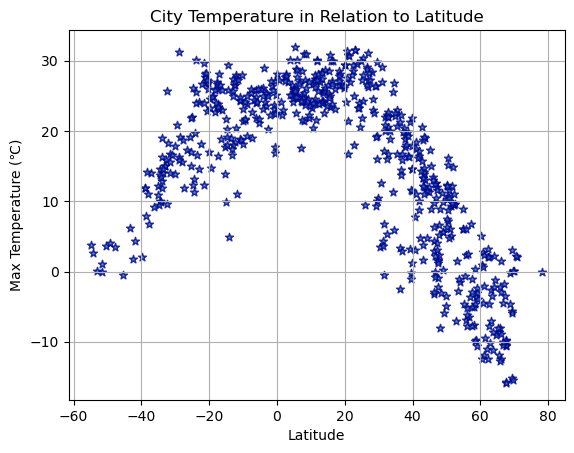

In [8]:
#map latitude and temperature
plt.scatter(
    place_data_df["Latitude"],
    place_data_df["Max Temperature"],
    edgecolor="darkblue",
    linewidths=1,
    marker="*",
    alpha=0.8,
    label = "Cities"
)

#label
plt.title("City Temperature in Relation to Latitude")
plt.ylabel("Max Temperature (℃)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Temp_v_Lat.png")

#display findings
plt.show()

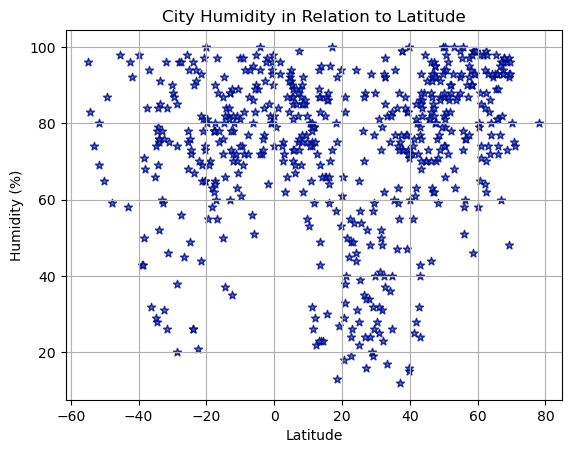

In [9]:
#map latitude and humidity
plt.scatter(
    place_data_df["Latitude"],
    place_data_df["Humidity"],
    edgecolor="darkblue",
    linewidths=1,
    marker="*",
    alpha=0.8,
    label = "Cities"
)

#label
plt.title("City Humidity in Relation to Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("humidity_v_Lat.png")

#display findings
plt.show()

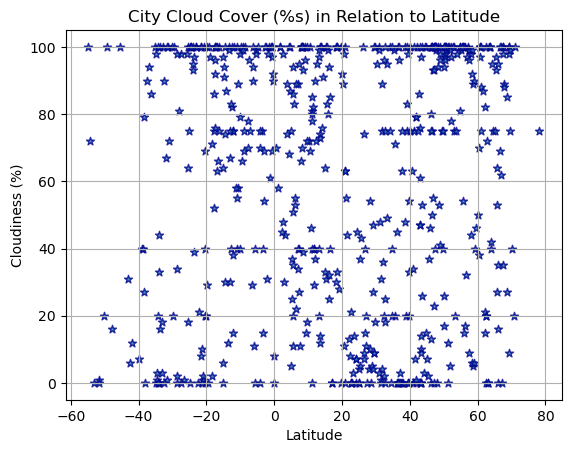

In [10]:
#map latitude and cloudiness
plt.scatter(
    place_data_df["Latitude"],
    place_data_df["Cloudiness"],
    edgecolor="darkblue",
    linewidths=1,
    marker="*",
    alpha=0.8,
    label = "Cities"
)

#label
plt.title("City Cloud Cover (%s) in Relation to Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("cloudiness_v_Lat.png")

#display findings
plt.show()

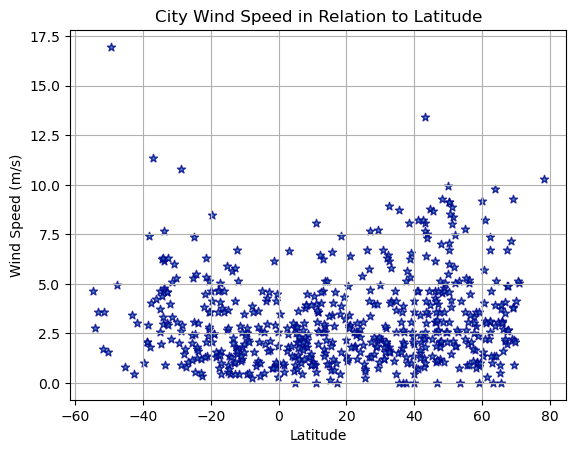

In [11]:
#map latitude and wind speed
plt.scatter(
    place_data_df["Latitude"],
    place_data_df["Wind Speed"],
    edgecolor="darkblue",
    linewidths=1,
    marker="*",
    alpha=0.8,
    label = "Cities"
)

#label
plt.title("City Wind Speed in Relation to Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("windspeed_v_Lat.png")

#display findings
plt.show()

In [12]:
#line regression analysis of charted data
def plot_linear_regression(x_values, y_values, title, text_coordinatess):
    #math (y=mx+b)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope +intercept
    line = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #annotate and plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line, text_coordinatess, fontsize=12, color="black")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-² value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    #display
    plt.show()

In [13]:
#northern hemisphere data
northern_df = place_data_df.loc[(place_data_df["Latitude"] >=0),:]

northern_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-0.09,80,75,10.29,SJ,1698727534
2,twon-brass,4.3151,6.2418,26.52,83,100,3.03,NG,1698727543
5,ribeira grande,38.5167,-28.7000,19.87,84,48,8.05,PT,1698727544
6,keflavik,64.0049,-22.5624,2.24,80,40,5.14,IS,1698727544
8,bakanas,44.8081,76.2772,11.37,70,100,8.77,KZ,1698727545


In [14]:
#southern hemisphere data
southern_df = place_data_df.loc[(place_data_df["Latitude"] <0),:]

southern_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,2.65,83,72,2.78,GS,1698727248
3,edinburgh of the seven seas,-37.0676,-12.3116,14.07,94,94,11.36,SH,1698727262
4,port mathurin,-19.6833,63.4167,24.54,81,29,8.49,MU,1698727544
7,tolanaro,-25.0319,46.9987,22.04,94,75,3.09,MG,1698727545
9,port-aux-francais,-49.3500,70.2167,4.04,87,100,16.96,TF,1698727545


#### Linear Regressions on Northern and Southern Hemispheres for Plotted Data

The r-² value is: 0.7621600450426672
The r value is: -0.8730177804848348


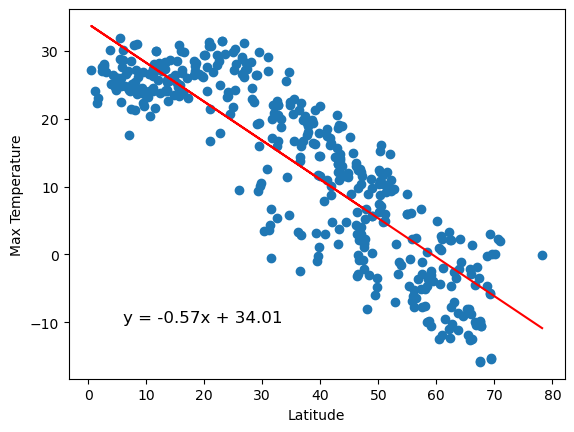

In [15]:
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temperature"]
plot_linear_regression(x_values,y_values, "Max Temperature", (6,-10))

The r-² value is: 0.5410331931155367
The r value is: 0.7355495857626029


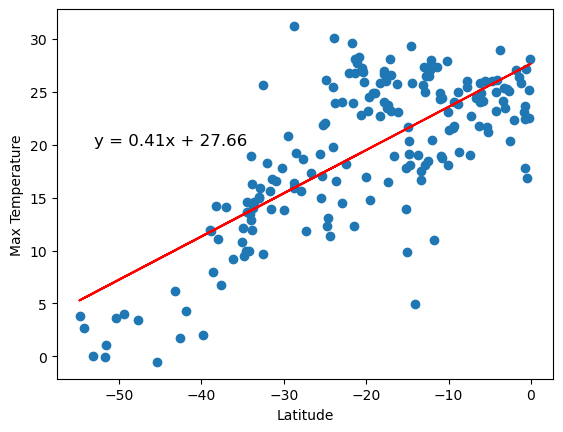

In [16]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temperature"]
plot_linear_regression(x_values,y_values, "Max Temperature", (-53,20))

The r-² value is: 0.07223587799443518
The r value is: 0.2687673305936478


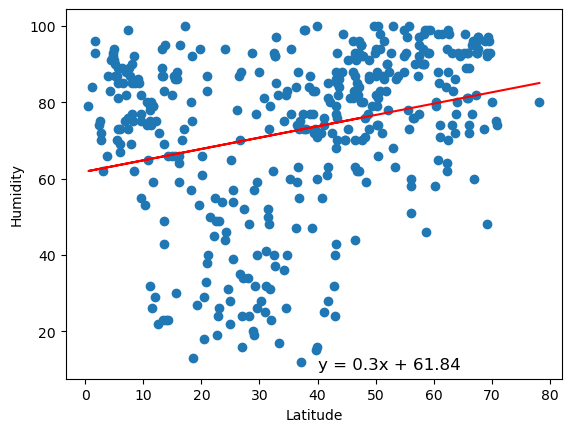

In [17]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (40,10))

The r-² value is: 0.046339326997262245
The r value is: 0.2152657125444325


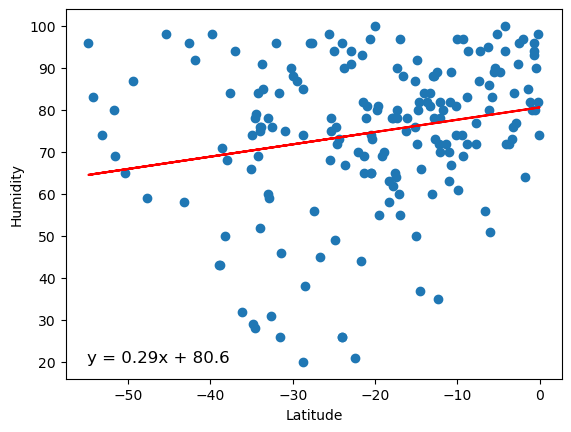

In [18]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (-55,20))

The r-² value is: 0.01022937544969457
The r value is: 0.10114037497307675


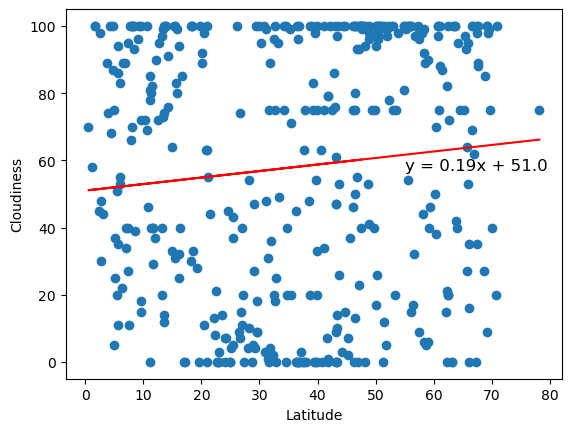

In [30]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (55,57))

The r-² value is: 0.06613284742577492
The r value is: 0.25716307554891105


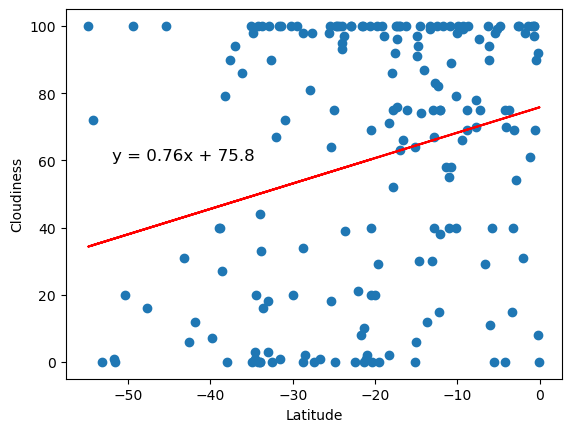

In [20]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (-52,60))

The r-² value is: 0.043673250342420276
The r value is: 0.2089814593269467


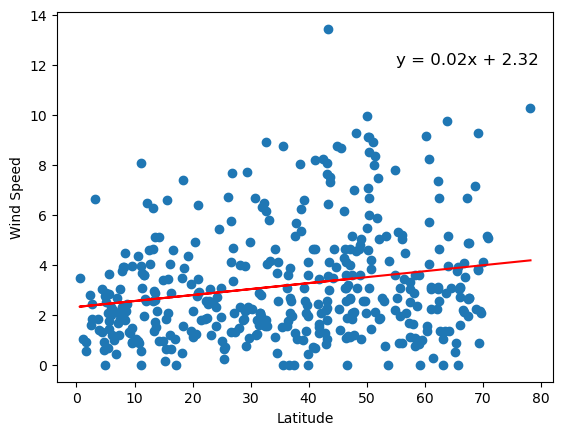

In [31]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (55,12))

The r-² value is: 0.09243112589264058
The r value is: -0.30402487709501763


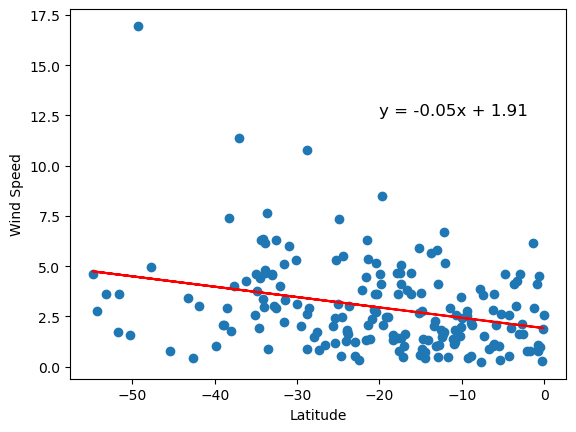

In [22]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (-20,12.5))

# VacationPy

In [23]:
#load csv created above
place_data_df = pd.read_csv("places.csv")

place_data_df.head()

,City ID,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,longyearbyen,78.2186,15.6401,-0.09,80,75,10.29,SJ,1698727534
1,1,grytviken,-54.2811,-36.5092,2.65,83,72,2.78,GS,1698727248
2,2,twon-brass,4.3151,6.2418,26.52,83,100,3.03,NG,1698727543
3,3,edinburgh of the seven seas,-37.0676,-12.3116,14.07,94,94,11.36,SH,1698727262
4,4,port mathurin,-19.6833,63.4167,24.54,81,29,8.49,MU,1698727544


In [24]:
#map cities on hvplot
plot_map = place_data_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    scale=1,
    color="City",
    alpha=0.5,
    tiles="OSM",
    frame_width=700,
    frame_height=500)

plot_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City)

In [25]:
#set personal limits
personal_place_df = place_data_df.loc[
    (place_data_df["Max Temperature"] < 22.2) & (place_data_df["Max Temperature"] >= 0) & (place_data_df["Wind Speed"] < 2) & (place_data_df["Cloudiness"] == 0)
]

#remonve NA values
personal_place_df = personal_place_df.dropna()

personal_place_df

,City ID,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
80,80,copiapo,-27.3667,-70.3333,11.83,56,0,0.80,CL,1698727563
160,160,selma,36.5708,-119.6121,14.43,63,0,0.00,US,1698727591
185,185,argo,37.6333,22.7333,17.67,73,0,1.29,GR,1698727598
253,253,ermoupolis,37.4423,24.9425,20.39,77,0,0.00,GR,1698727617
320,320,balaguer,41.7912,0.8109,8.82,85,0,1.52,ES,1698727638
328,328,corinto,37.9407,22.9573,18.05,73,0,1.03,GR,1698727354
355,355,ghat,24.9647,10.1728,21.80,22,0,1.91,LY,1698727649
373,373,mount pleasant,32.7941,-79.8626,20.56,97,0,1.54,US,1698727638
391,391,twin lakes,39.8250,-105.0047,1.14,71,0,0.45,US,1698727663
414,414,mar del plata,-38.0023,-57.5575,11.08,68,0,1.79,AR,1698727669


In [26]:
#hotel options
lodging_df = personal_place_df[["City", "Country", "Latitude", "Longitude", "Humidity"]].copy()
lodging_df["Hotel Name"] = ""

#display
lodging_df

,City,Country,Latitude,Longitude,Humidity,Hotel Name
80,copiapo,CL,-27.3667,-70.3333,56,
160,selma,US,36.5708,-119.6121,63,
185,argo,GR,37.6333,22.7333,73,
253,ermoupolis,GR,37.4423,24.9425,77,
320,balaguer,ES,41.7912,0.8109,85,
328,corinto,GR,37.9407,22.9573,73,
355,ghat,LY,24.9647,10.1728,22,
373,mount pleasant,US,32.7941,-79.8626,97,
391,twin lakes,US,39.8250,-105.0047,71,
414,mar del plata,AR,-38.0023,-57.5575,68,


In [27]:
#find nearest hotel
radius = 10000
params = {
    "categories": "accommodation.hotel",
    "apiKey": geo_api,
    "limit": 20
}

print("Finding accommodations")

#loop through lodging_df
for index, row in lodging_df.iterrows():
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    
    #set parameters
    params["filter"] = f"circle:{longitude}, {latitude}, {radius}"
    params["bias"] = f"proximity:{longitude}, {latitude}"
    
    #set base url
    lodging_url = "https://api.geoapify.com/v2/places"
    
    #request
    lodging_info = requests.get(lodging_url, params=params)
    print(lodging_info.status_code)
    
    #use json
    lodging_info = lodging_info.json()
    
    #select first results per location
    try:
        lodging_df.loc[index, "Hotel Name"] = lodging_info["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        lodging_df.loc[index, "Hotel Name"] = "No accommodations found."
            
#display findings
#something is blocking my hotel findings...
lodging_df

Finding accommodations
400
400
400
400
400
400
400
400
400
400
400


,City,Country,Latitude,Longitude,Humidity,Hotel Name
80,copiapo,CL,-27.3667,-70.3333,56,No accommodations found.
160,selma,US,36.5708,-119.6121,63,No accommodations found.
185,argo,GR,37.6333,22.7333,73,No accommodations found.
253,ermoupolis,GR,37.4423,24.9425,77,No accommodations found.
320,balaguer,ES,41.7912,0.8109,85,No accommodations found.
328,corinto,GR,37.9407,22.9573,73,No accommodations found.
355,ghat,LY,24.9647,10.1728,22,No accommodations found.
373,mount pleasant,US,32.7941,-79.8626,97,No accommodations found.
391,twin lakes,US,39.8250,-105.0047,71,No accommodations found.
414,mar del plata,AR,-38.0023,-57.5575,68,No accommodations found.


In [32]:
#plot reprised map of cities

plot_map = lodging_df.hvplot.points("Longitude",
                                   "Latitude",
                                   geo=True,
                                   size="Humidity",
                                   scale=1,
                                   color="City",
                                   alpha=0.5,
                                   tiles="OSM",
                                   frame_width=700,
                                   frame_height=500,
                                   hover_cols=["Hotel Name", "Country"])

plot_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City,Humidity,Hotel Name,Country)